In [1]:
%matplotlib inline

In [33]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [34]:
len(train_data)

8982

In [35]:
len(test_data)

2246

In [36]:
def decode_words(data):
    word_index = reuters.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in data])
    print(decoded_newswire)

In [37]:
decode_words(train_data[2])

? shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one split effective january 6 1987 per share amounts are calculated after preferred stock dividends loss continuing operations for the qtr 1986 includes gains of sale of investments in ? corp of 14 mln dlrs and associated companies of 4 189 000 less writedowns of investments in national ? inc of 11 8 mln and ? corp of 15 6 mln reuter 3


In [38]:
train_labels[10]

3

In [39]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1;
    return results

In [59]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [49]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [50]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [71]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu',))
model.add(layers.Dense(46, activation='softmax'))

In [72]:
model.compile(optimizer='rmsprop',
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])

In [73]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [74]:
history = model.fit(partial_x_train,
                           partial_y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 84us/step - loss: 2.1648 - acc: 0.5436 - val_loss: 1.4225 - val_acc: 0.6700
Epoch 2/20
7982/7982 [==============================] - 0s 53us/step - loss: 1.1289 - acc: 0.7468 - val_loss: 1.0965 - val_acc: 0.7760
Epoch 3/20
7982/7982 [==============================] - 0s 53us/step - loss: 0.7947 - acc: 0.8294 - val_loss: 0.9838 - val_acc: 0.7920
Epoch 4/20
7982/7982 [==============================] - 0s 52us/step - loss: 0.5701 - acc: 0.8772 - val_loss: 0.9158 - val_acc: 0.8070
Epoch 5/20
7982/7982 [==============================] - 0s 53us/step - loss: 0.4132 - acc: 0.9118 - val_loss: 0.8726 - val_acc: 0.8230
Epoch 6/20
7982/7982 [==============================] - 0s 52us/step - loss: 0.3269 - acc: 0.9278 - val_loss: 0.8540 - val_acc: 0.8300
Epoch 7/20
7982/7982 [==============================] - 0s 52us/step - loss: 0.2372 - acc: 0.9442 - val_loss: 0.8717 - val_acc: 0.8240
Epoch 8

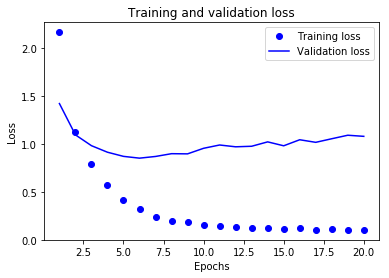

In [75]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

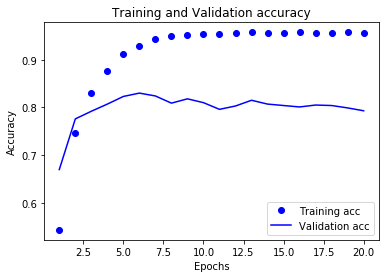

In [76]:
plt.clf()
acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [79]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu',))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])

model.fit(partial_x_train,
             partial_y_train,
             epochs=3,
             batch_size=512,
             validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/3
7982/7982 [==============================] - 1s 63us/step - loss: 2.2291 - acc: 0.5499 - val_loss: 1.4026 - val_acc: 0.6810
Epoch 2/3
7982/7982 [==============================] - 0s 41us/step - loss: 1.1250 - acc: 0.7575 - val_loss: 1.1107 - val_acc: 0.7580
Epoch 3/3
2246/2246 [==============================] - 0s 53us/step


In [80]:
results

[1.054753679520088, 0.766251113143014]

In [66]:
predictions = model.predict(x_test)

In [67]:
predictions[0].shape

(46,)

In [68]:
np.sum(predictions[0])

0.99999994

In [69]:
np.argmax(predictions[0])

3